In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import pandas as pd


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results

from experiments.evaluate_metrics import EvaluateMetrics

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics']
)

network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
#eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

#simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
#simulation_engine.run()

{'period': 1, 'transaction_volume': 1021143.657303026, 'current_supply': 100994843.31038061, 'fees_collected': 10211.43657303026, 'token_burned': 5105.71828651513, 'staking_rewards': {'short_term': 0.005, 'medium_term': 0.02, 'long_term': 0.06}, 'total_rewards': 0.08499999999999999, 'inflation_tokens': 1999897.8873342697, 'deflation_tokens': 999948.9436671349, 'primary_to_secondary': 102114.3657303026, 'secondary_token_supply': 397885.6342696974, 'economic_scenarios': {'high_volume': 1531715.485954539, 'low_volume': 510571.828651513, 'validator_exit': 10000000.0}}


In [3]:
simulation_results_baseline = economic_model.run_simulation(
    inflation_rate=0.02,
    deflation_rate=0.01,
    conversion_rate=0.1,  # Assume constant for now
    secondary_token_supply=500000,
    periods=12
)
simulation_results_baseline

[{'period': 1,
  'transaction_volume': 99552.41212051571,
  'current_supply': 113762559.9803055,
  'fees_collected': 995.5241212051571,
  'token_burned': 6358.2996588941,
  'staking_rewards': {'short_term': 0.015,
   'medium_term': 0.18,
   'long_term': 0.5475},
  'total_rewards': 0.7424999999999999,
  'inflation_tokens': 2252723.9600060494,
  'deflation_tokens': 1126361.9800030247,
  'primary_to_secondary': 9955.241212051573,
  'secondary_token_supply': 490044.7587879484,
  'economic_scenarios': {'high_volume': 149328.61818077357,
   'low_volume': 49776.20606025786,
   'validator_exit': 10000000.0}},
 {'period': 2,
  'transaction_volume': 104120.90273035337,
  'current_supply': 114893238.63681929,
  'fees_collected': 1041.2090273035337,
  'token_burned': 6878.9041725458665,
  'staking_rewards': {'short_term': 0.015,
   'medium_term': 0.18,
   'long_term': 0.5475},
  'total_rewards': 0.7424999999999999,
  'inflation_tokens': 2275113.6363726594,
  'deflation_tokens': 1137556.8181863297,

In [4]:
simulation_results_high_inflation = economic_model.run_simulation(
    inflation_rate=0.05,
    deflation_rate=0.01,
    conversion_rate=0.1,
    secondary_token_supply=500000,
    periods=12
)


In [7]:
simulation_results_high_deflation = economic_model.run_simulation(
    inflation_rate=0.02,
    deflation_rate=0.02,
    conversion_rate=0.1,
    secondary_token_supply=500000,
    periods=12
)

economic_model.transaction_volume *= 1.5  # Boosting the transaction volume
simulation_results_high_volume = economic_model.run_simulation(
    inflation_rate=0.02,
    deflation_rate=0.01,
    conversion_rate=0.1,
    secondary_token_supply=500000,
    periods=12
)

economic_model.transaction_volume *= 0.5  # Lowering the transaction volume
simulation_results_low_volume = economic_model.run_simulation(
    inflation_rate=0.02,
    deflation_rate=0.01,
    conversion_rate=0.1,
    secondary_token_supply=500000,
    periods=12
)


In [8]:
for result in simulation_results_baseline:
    print(f"Period: {result['period']}, Current Supply: {result['current_supply']:.2f}, Tokens Burned: {result['token_burned']:.2f}")


Period: 1, Current Supply: 113762559.98, Tokens Burned: 6358.30
Period: 2, Current Supply: 114893238.64, Tokens Burned: 6878.90
Period: 3, Current Supply: 116034681.27, Tokens Burned: 7416.34
Period: 4, Current Supply: 117187011.79, Tokens Burned: 7937.67
Period: 5, Current Supply: 118350348.10, Tokens Burned: 8450.06
Period: 6, Current Supply: 119524825.62, Tokens Burned: 8937.34
Period: 7, Current Supply: 120710570.07, Tokens Burned: 9410.45
Period: 8, Current Supply: 121907673.35, Tokens Burned: 9904.13
Period: 9, Current Supply: 123116271.67, Tokens Burned: 10375.41
Period: 10, Current Supply: 124336485.95, Tokens Burned: 10840.78
Period: 11, Current Supply: 125568445.93, Tokens Burned: 11292.70
Period: 12, Current Supply: 126812262.77, Tokens Burned: 11750.86


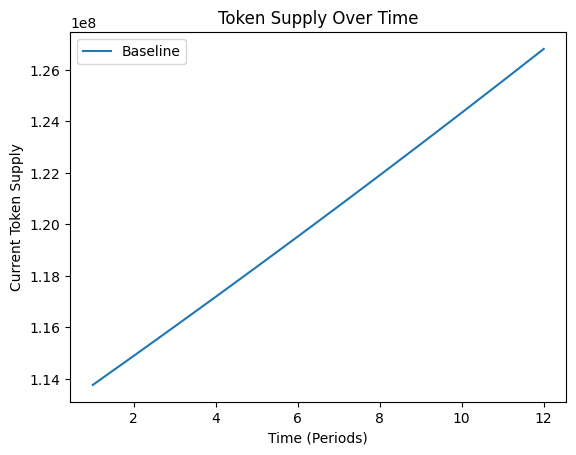

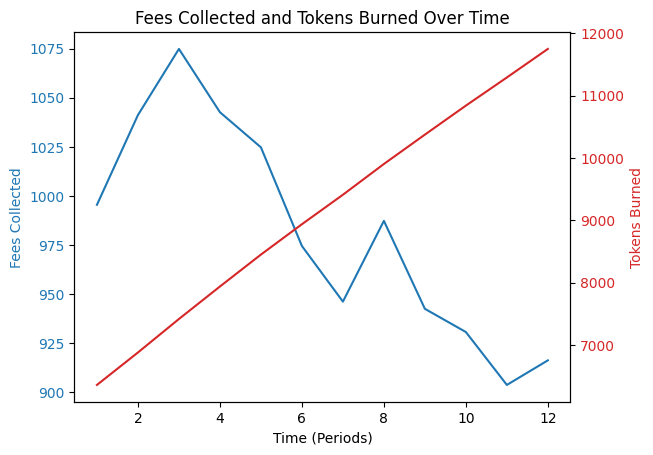

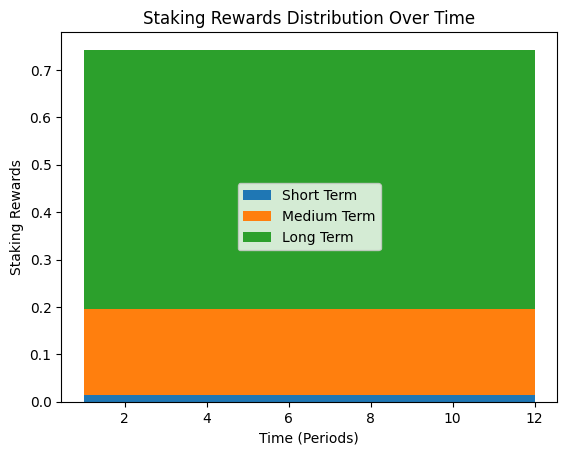

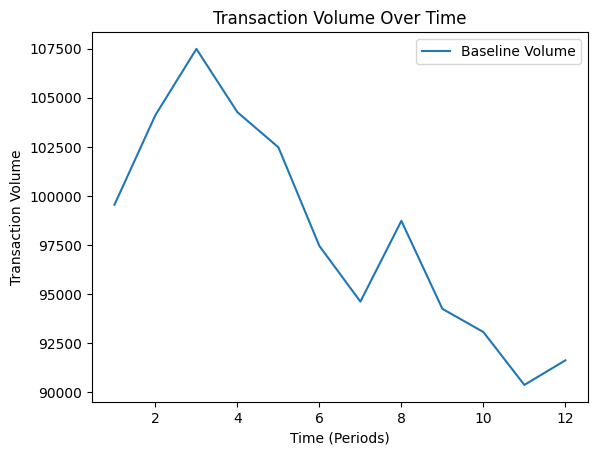

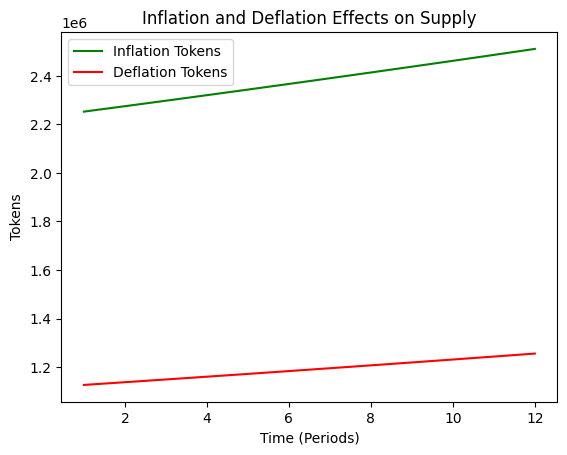

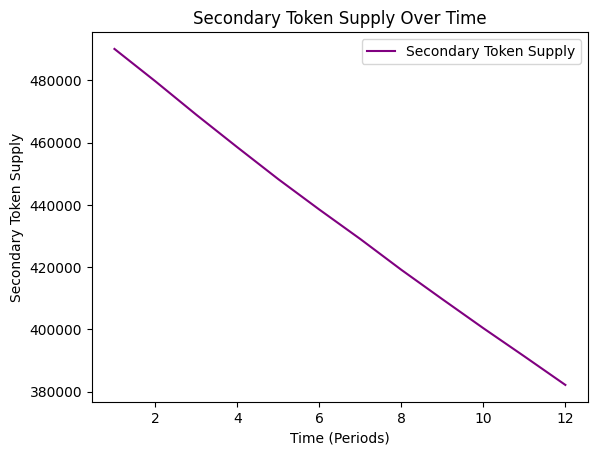

In [9]:
import matplotlib.pyplot as plt

# Plot 1: Token Supply Over Time
def plot_token_supply(simulation_results, label):
    periods = [result['period'] for result in simulation_results]
    token_supply = [result['current_supply'] for result in simulation_results]
    
    plt.plot(periods, token_supply, label=label)
    plt.xlabel('Time (Periods)')
    plt.ylabel('Current Token Supply')
    plt.title('Token Supply Over Time')
    plt.legend()
    plt.show()

# Plot 2: Fees Collected and Tokens Burned Over Time (Dual-Axis)
def plot_fees_and_burn(simulation_results):
    periods = [result['period'] for result in simulation_results]
    fees_collected = [result['fees_collected'] for result in simulation_results]
    tokens_burned = [result['token_burned'] for result in simulation_results]
    
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Time (Periods)')
    ax1.set_ylabel('Fees Collected', color=color)
    ax1.plot(periods, fees_collected, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Tokens Burned', color=color)
    ax2.plot(periods, tokens_burned, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Fees Collected and Tokens Burned Over Time')
    plt.show()

# Plot 3: Staking Rewards Distribution Over Time
def plot_staking_rewards(simulation_results):
    periods = [result['period'] for result in simulation_results]
    short_term_rewards = [result['staking_rewards']['short_term'] for result in simulation_results]
    medium_term_rewards = [result['staking_rewards']['medium_term'] for result in simulation_results]
    long_term_rewards = [result['staking_rewards']['long_term'] for result in simulation_results]
    
    plt.stackplot(periods, short_term_rewards, medium_term_rewards, long_term_rewards, 
                  labels=['Short Term', 'Medium Term', 'Long Term'])
    plt.xlabel('Time (Periods)')
    plt.ylabel('Staking Rewards')
    plt.title('Staking Rewards Distribution Over Time')
    plt.legend()
    plt.show()

# Plot 4: Transaction Volume Over Time in Economic Scenarios
def plot_transaction_volume(simulation_results, label):
    periods = [result['period'] for result in simulation_results]
    transaction_volume = [result['transaction_volume'] for result in simulation_results]
    
    plt.plot(periods, transaction_volume, label=label)
    plt.xlabel('Time (Periods)')
    plt.ylabel('Transaction Volume')
    plt.title('Transaction Volume Over Time')
    plt.legend()
    plt.show()

# Plot 5: Inflation and Deflation Effects on Supply
def plot_inflation_deflation(simulation_results):
    periods = [result['period'] for result in simulation_results]
    inflation_tokens = [result['inflation_tokens'] for result in simulation_results]
    deflation_tokens = [result['deflation_tokens'] for result in simulation_results]
    
    plt.plot(periods, inflation_tokens, label='Inflation Tokens', color='green')
    plt.plot(periods, deflation_tokens, label='Deflation Tokens', color='red')
    plt.xlabel('Time (Periods)')
    plt.ylabel('Tokens')
    plt.title('Inflation and Deflation Effects on Supply')
    plt.legend()
    plt.show()

# Plot 6: Secondary Token Supply Over Time
def plot_secondary_token_supply(simulation_results):
    periods = [result['period'] for result in simulation_results]
    secondary_token_supply = [result['secondary_token_supply'] for result in simulation_results]
    
    plt.plot(periods, secondary_token_supply, label='Secondary Token Supply', color='purple')
    plt.xlabel('Time (Periods)')
    plt.ylabel('Secondary Token Supply')
    plt.title('Secondary Token Supply Over Time')
    plt.legend()
    plt.show()

# Example: Visualizing the results from the baseline simulation
plot_token_supply(simulation_results_baseline, label='Baseline')
plot_fees_and_burn(simulation_results_baseline)
plot_staking_rewards(simulation_results_baseline)
plot_transaction_volume(simulation_results_baseline, label='Baseline Volume')
plot_inflation_deflation(simulation_results_baseline)
plot_secondary_token_supply(simulation_results_baseline)
